In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import numpy as np

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline

%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/periodic"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = read_run_dir(run_dir)
df # list all the runs in our run_dir

run_id                      task  \
3  ef14b05a-d15a-4418-a47d-1ca6be3df829  linear_modulo_regression   
4  1643cdec-59ca-4f8e-ae37-1f9c73c31d8a    linear_sine_regression   
0  b3d2bde5-95b7-4227-96b3-1cad688fec80    radial_sine_regression   
6  8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e            saw_regression   
1  cb16b7e7-92c0-47fa-8a5b-40f9840f7e17    square_wave_regression   
2  1468ab06-745f-43e9-9795-77053ef5cabf       sum_sine_regression   
5  9130cfcc-bc09-4887-ae64-2d0a869f8718  triangle_wave_regression   

         model kwargs  num_tasks  num_examples  n_dims  n_layer  n_head  \
3  Transformer                -1            -1      20       12       8   
4  Transformer                -1            -1      20       12       8   
0  Transformer                -1            -1      20       12       8   
6  Transformer                -1            -1      20       12       8   
1  Transformer                -1            -1      20       12       8   
2  Transformer                -1            -1      20       12       8   
5  Transformer                -1            -1      20       12       8   

                            run_name  
3  linear_modulo_regression_standard  
4    linear_sine_regression_standard  
0    radial_sine_regression_standard  
6            saw_regression_standard  
1    square_wave_regression_standard  
2       sum_sine_regression_standard  
5  triangle_wave_regression_standard

In [12]:
# task = "linear_regression"
# task = "sparse_linear_regression"
# task = "decision_tree"
# task = "relu_2nn_regression"
# task = "linear_modulo_regression"
task = "sum_sine_regression"

run_id = df[df["task"] == task]["run_id"].iat[0]

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = True

if recompute_metrics:
    get_run_metrics(run_path, step=500_000)  # these are normally precomputed at the end of training

  0%|          | 0/14 [00:00<?, ?it/s]

Computing Evaluation standard on Model torch_sine_sum
Evaluating batch 1 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 2 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 3 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 4 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 5 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 6 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 7 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 8 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 9 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
Evaluating batch 10 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 1

  7%|▋         | 1/14 [39:40<8:35:44, 2380.31s/it]

Computing Evaluation random_quadrants on Model torch_sine_sum
Evaluating batch 1 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.

 14%|█▍        | 2/14 [1:24:42<8:33:57, 2569.77s/it]

Computing Evaluation orthogonal_train_test on Model torch_sine_sum
Evaluating batch 1 of 20
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101])
xs.shape = torch.Size([64, 101, 20])
ys.shape = torch.Size([64, 101]

linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 1/1 [00:00<00:00, 3243.85it/s]


{'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [1.402273178100586, 0.18071141839027405, 0.1468854695558548, 0.1122397631406784, 0.1301683634519577, 0.11312993615865707, 0.11791690438985825, 0.10616123676300049, 0.09607330709695816, 0.1132163554430008, 0.10090166330337524, 0.1141129732131958, 0.08930620551109314, 0.1026373878121376, 0.10077265650033951, 0.1014476865530014, 0.09808273613452911, 0.09754855930805206, 0.10005287826061249, 0.09215517342090607, 0.10028745979070663, 0.09769026935100555, 0.10559868812561035, 0.11038658767938614, 0.0995870977640152, 0.10521437972784042, 0.09394233673810959, 0.09860255569219589, 0.09933948516845703, 0.10419492423534393, 0.09823133051395416, 0.08896724134683609, 0.09477151930332184, 0.09231538325548172, 0.09331788867712021, 0.09099410474300385, 0.10900278389453888, 0.08423744142055511, 0.09939531981945038, 0.1106085553765297, 0.09143165498971939], 'std': [2.4391000270843506, 0.8105398416519165, 0.5473025441169739, 0.37308695912361145, 0.5

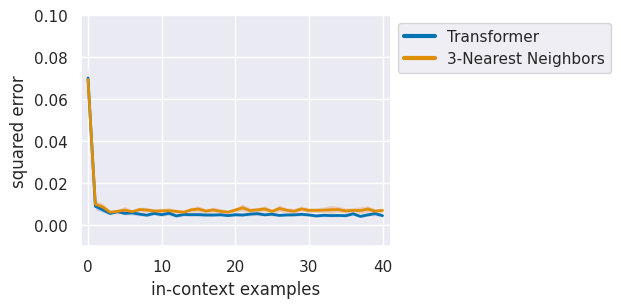

In [69]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
fig, ax = basic_plot(metrics["standard"], models=models)
ax.set_ylim(-0.01, 0.1)
plt.show()

fourier_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 1/1 [00:00<00:00, 4928.68it/s]


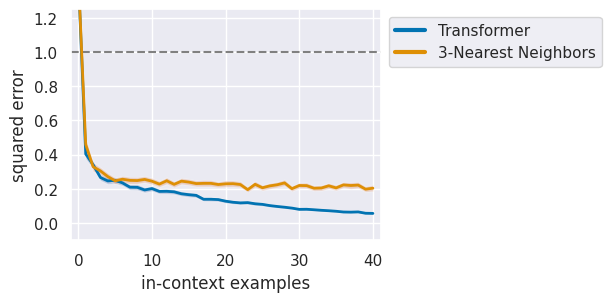

In [6]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
fig, ax = basic_plot(metrics["standard"], models=models)
# ax.set_ylim(-0.01, 0.1)
plt.show()

100%|██████████| 14/14 [00:00<00:00, 129339.77it/s]


sum_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 14/14 [00:00<00:00, 94557.58it/s]


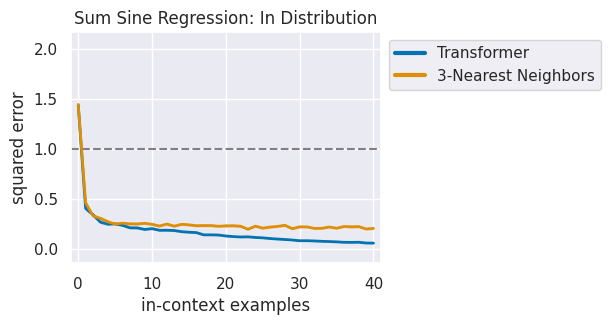

100%|██████████| 14/14 [00:00<00:00, 77672.30it/s]


radial_sine_regression_standard b3d2bde5-95b7-4227-96b3-1cad688fec80


100%|██████████| 14/14 [00:00<00:00, 105422.36it/s]


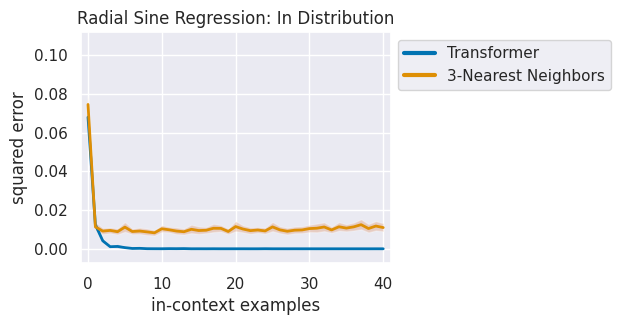

100%|██████████| 14/14 [00:00<00:00, 68042.01it/s]


linear_sine_regression_standard 1643cdec-59ca-4f8e-ae37-1f9c73c31d8a


100%|██████████| 14/14 [00:00<00:00, 71873.02it/s]


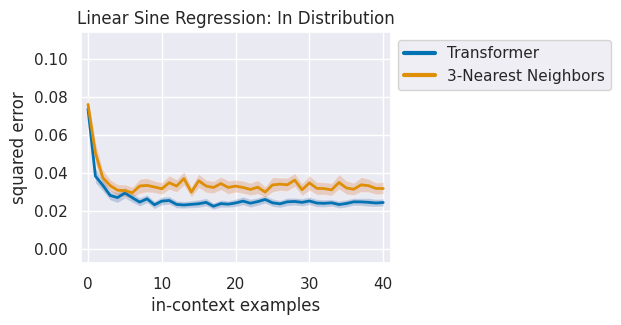

100%|██████████| 14/14 [00:00<00:00, 119837.26it/s]


linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 14/14 [00:00<00:00, 157006.03it/s]


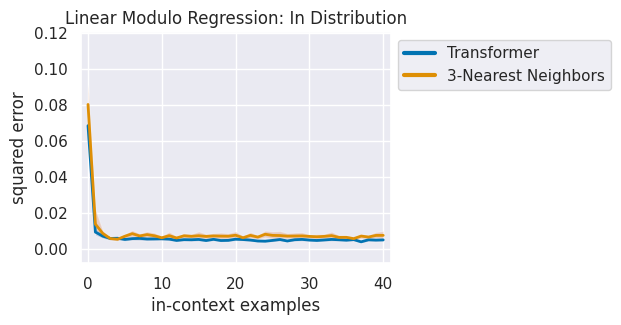

100%|██████████| 14/14 [00:00<00:00, 66200.97it/s]


saw_regression_standard 8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e


100%|██████████| 14/14 [00:00<00:00, 104857.60it/s]


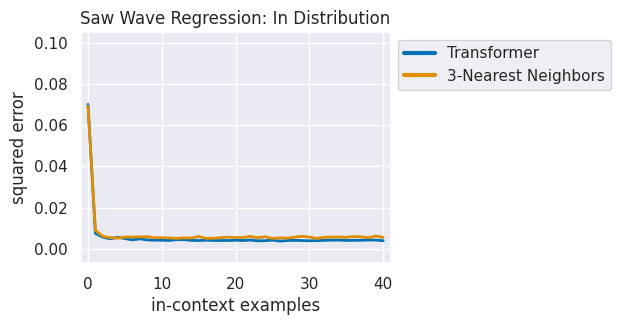

100%|██████████| 14/14 [00:00<00:00, 81217.50it/s]


square_wave_regression_standard cb16b7e7-92c0-47fa-8a5b-40f9840f7e17


100%|██████████| 14/14 [00:00<00:00, 89376.34it/s]


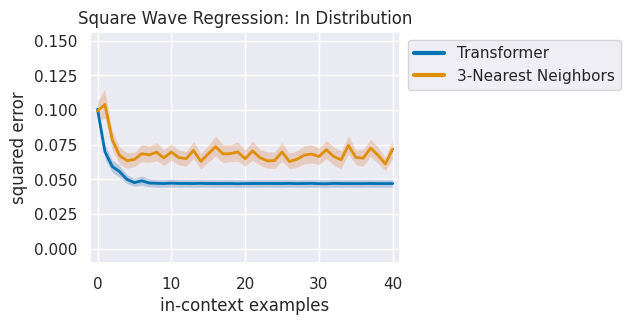

100%|██████████| 14/14 [00:00<00:00, 62534.88it/s]


triangle_wave_regression_standard 9130cfcc-bc09-4887-ae64-2d0a869f8718


100%|██████████| 14/14 [00:00<00:00, 88168.55it/s]


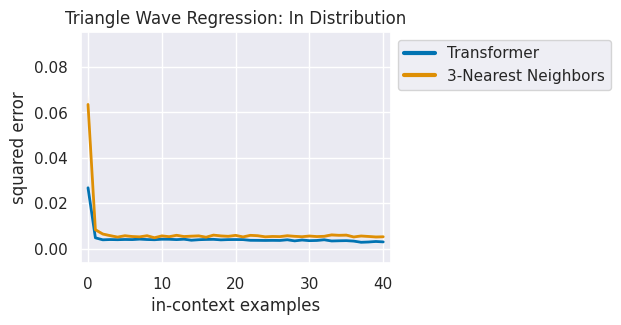

In [8]:
tasks = [
    "sum_sine_regression", 
    "radial_sine_regression", 
    "linear_sine_regression", 
    "linear_modulo_regression", 
    "saw_regression", 
    "square_wave_regression", 
    "triangle_wave_regression"
]

task_to_title = {
    "sum_sine_regression": "Sum Sine Regression", 
    "radial_sine_regression": "Radial Sine Regression",
    "linear_sine_regression": "Linear Sine Regression",
    "linear_modulo_regression": "Linear Modulo Regression",
    "saw_regression": "Saw Wave Regression",
    "square_wave_regression": "Square Wave Regression",
    "triangle_wave_regression": "Triangle Wave Regression",
}

for task in tasks:
    run_id = df[df["task"] == task]["run_id"].iat[0]

    run_path = os.path.join(run_dir, task, run_id)
    recompute_metrics = True

    if recompute_metrics:
        get_run_metrics(run_path, step=500_000)

    
    def valid_row(r):
        return r.task == task and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
    _, conf = get_model_from_run(run_path, only_conf=True)
    n_dims = conf.model.n_dims

    models = relevant_model_names[task]
    fig, ax = basic_plot(metrics["standard"], models=models)

    max_err = 0
    for name, metric in metrics.items():
        if name != "standard":
            continue
        for name, vs in metric.items():
            max_err = max(np.max(vs["mean"]), max_err)

    ax.set_ylim(-.1 * max_err, 1.5 * max_err)
    ax.set_xlim(-1, len(vs["mean"]))

    plt.title(task_to_title[task] + ": In Distribution")
    plt.show()

sum_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 1/1 [00:00<00:00, 8439.24it/s]


radial_sine_regression_standard b3d2bde5-95b7-4227-96b3-1cad688fec80


100%|██████████| 14/14 [00:00<00:00, 97058.27it/s]


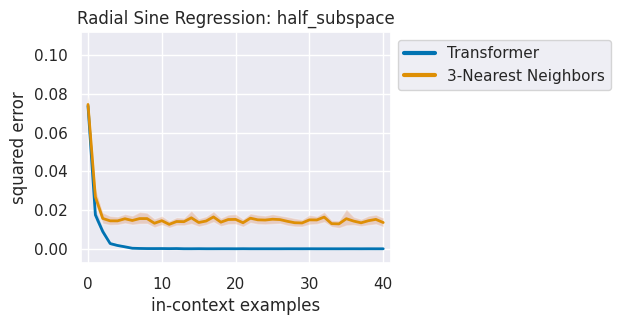

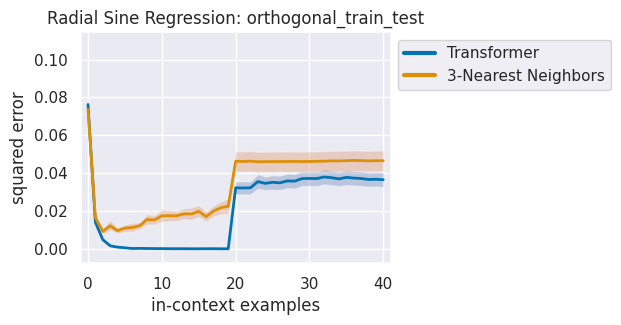

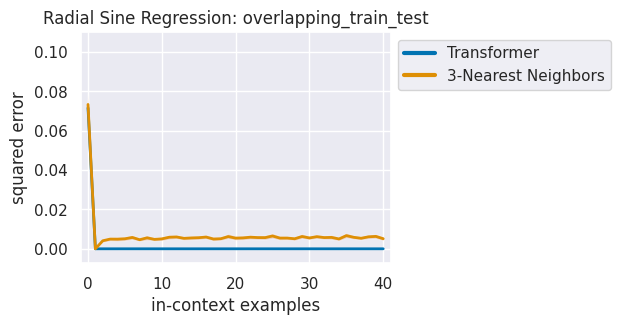

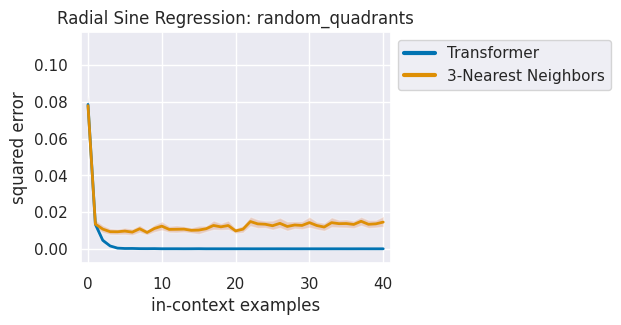

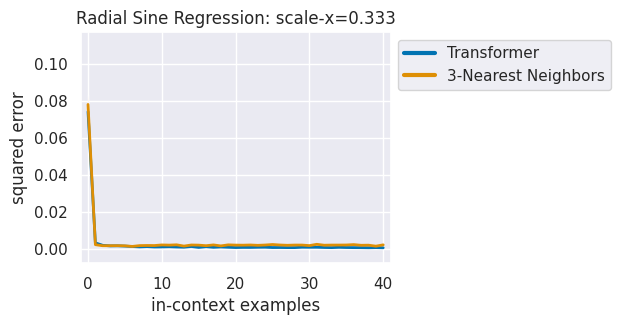

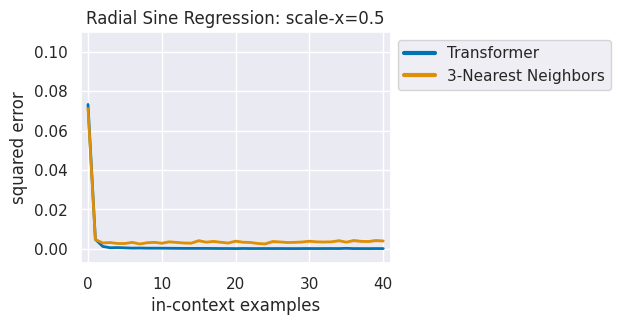

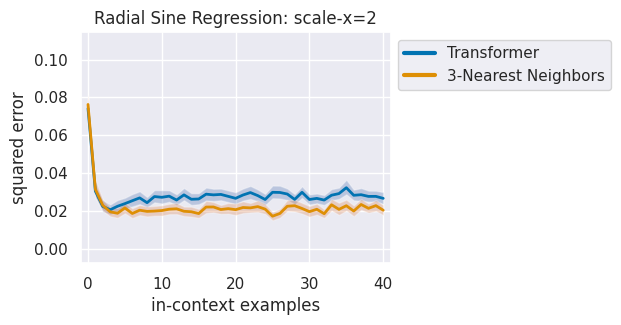

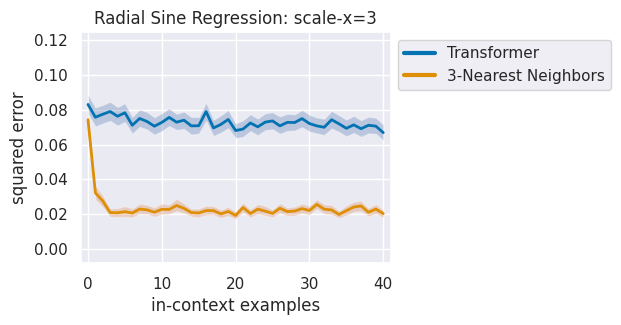

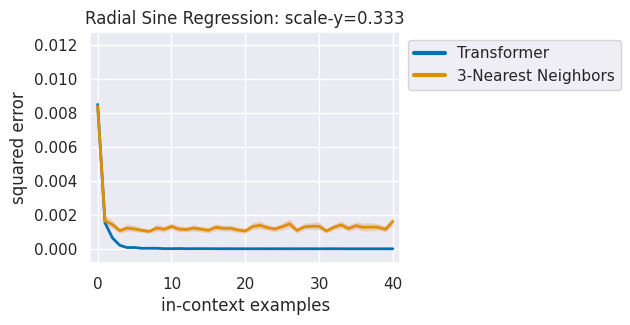

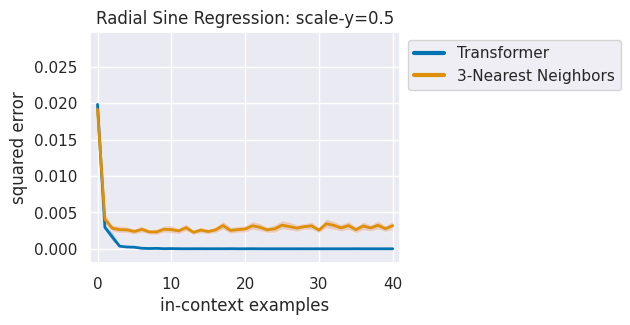

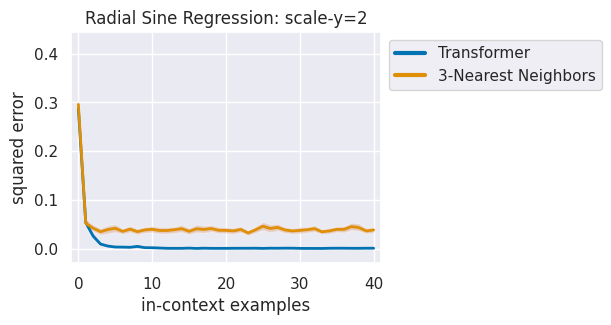

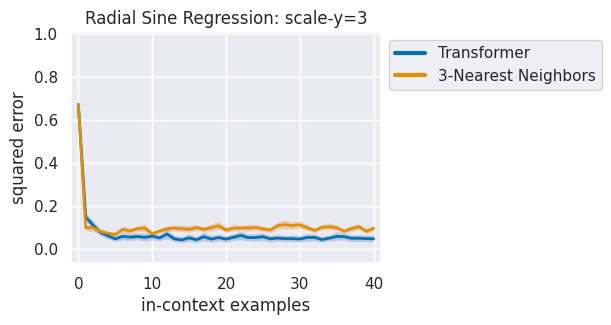

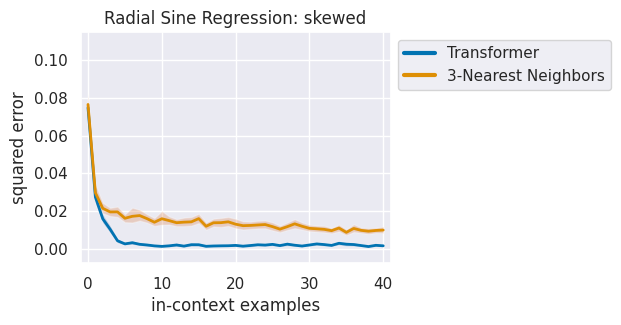

linear_sine_regression_standard 1643cdec-59ca-4f8e-ae37-1f9c73c31d8a


100%|██████████| 14/14 [00:00<00:00, 22480.96it/s]


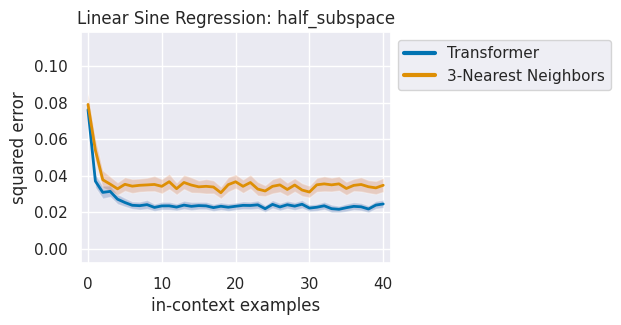

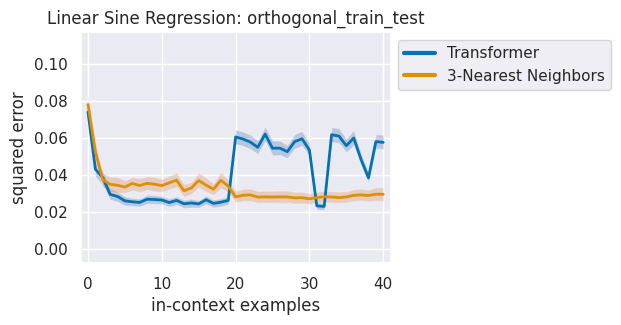

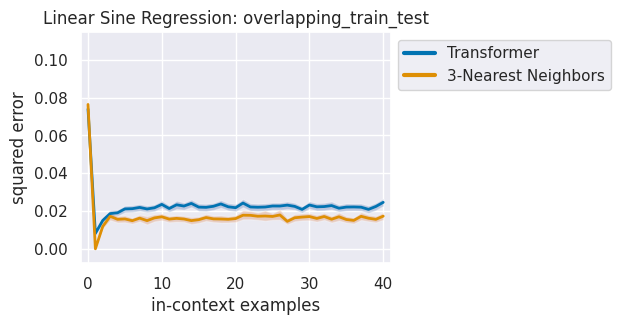

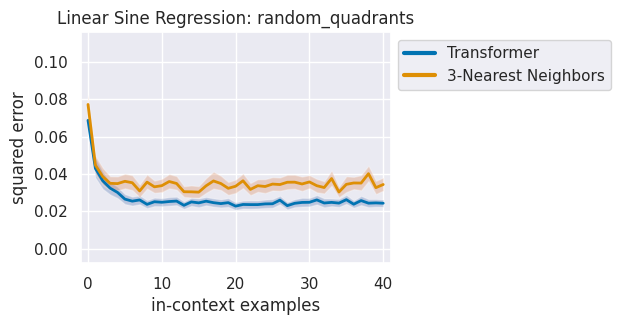

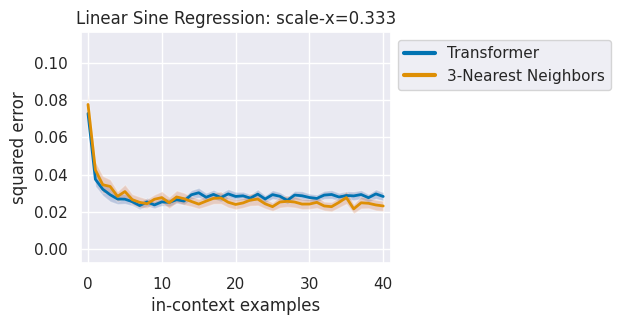

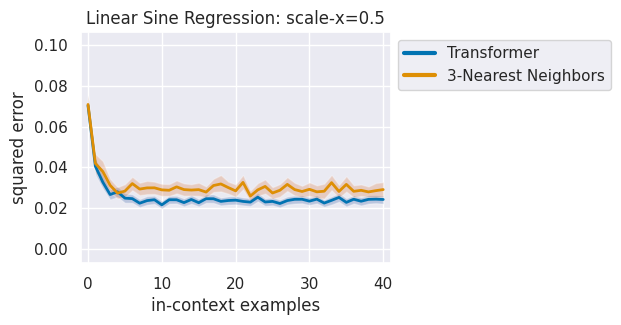

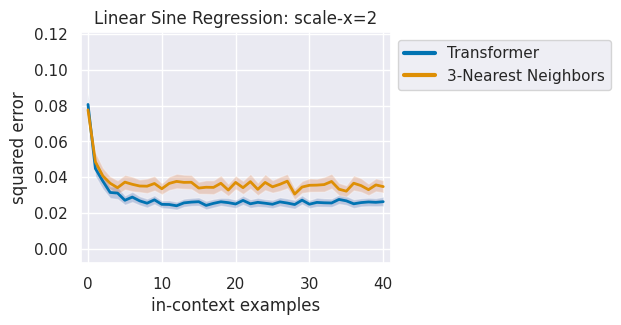

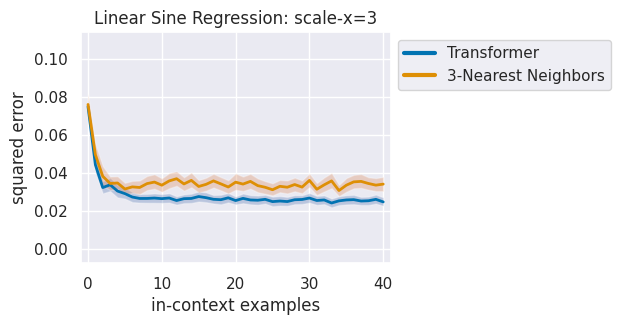

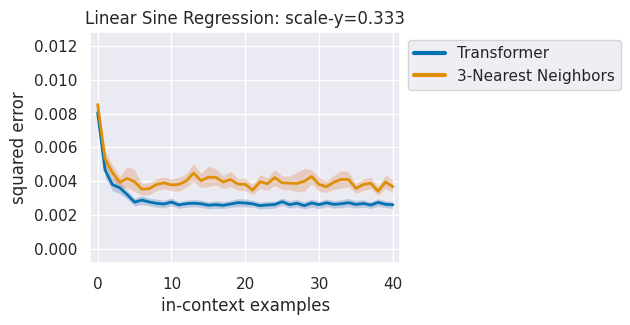

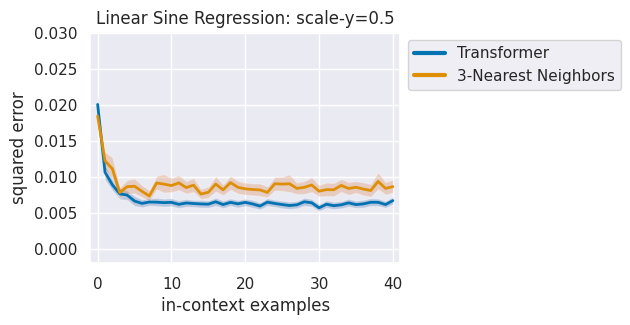

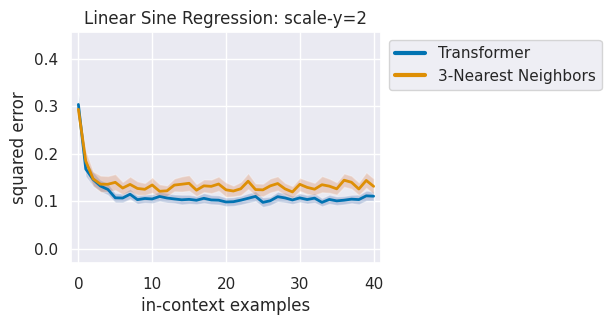

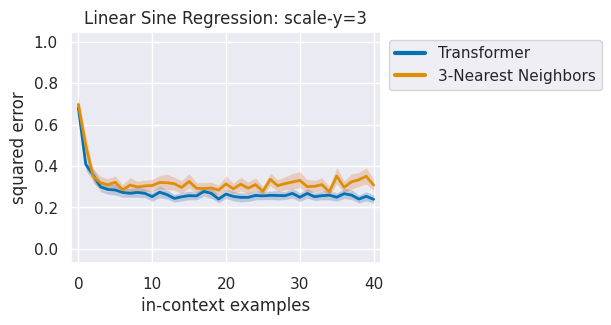

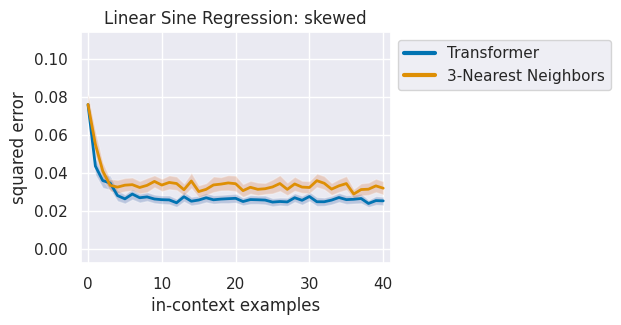

linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 14/14 [00:00<00:00, 120328.39it/s]


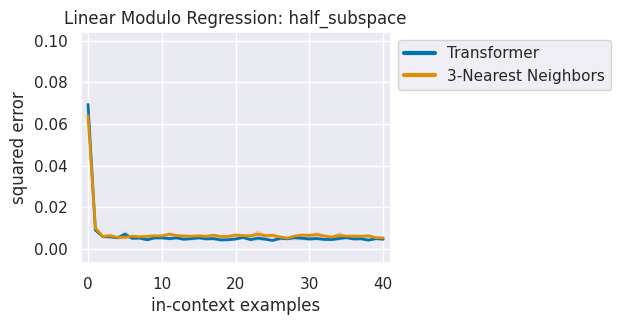

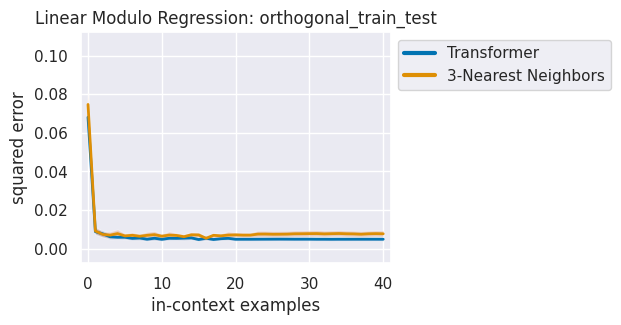

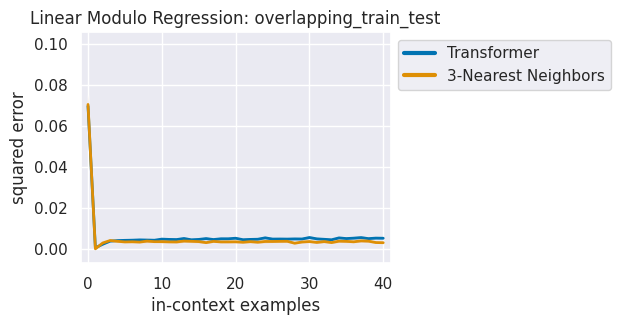

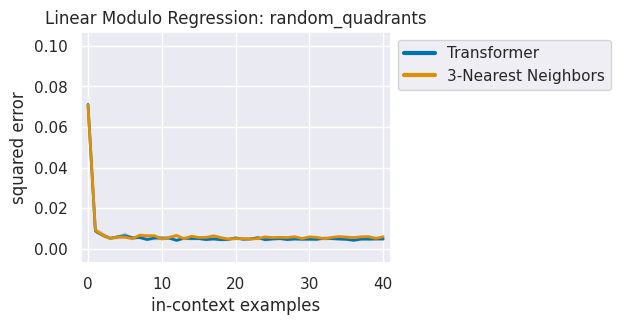

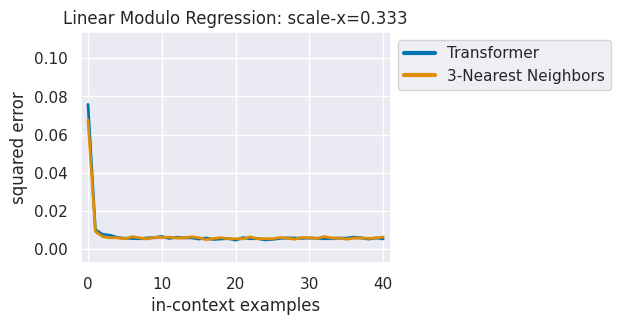

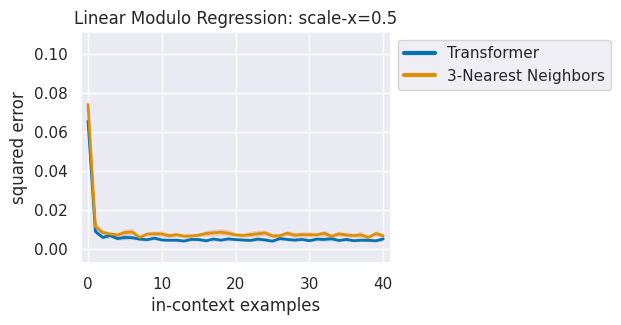

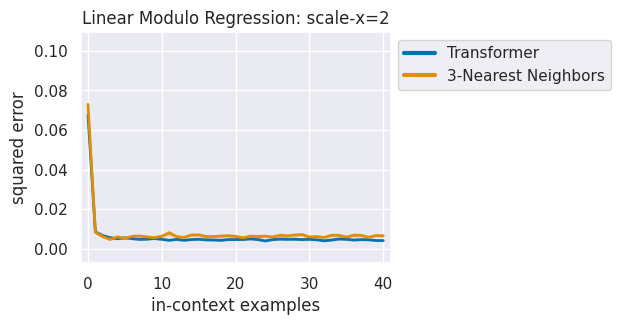

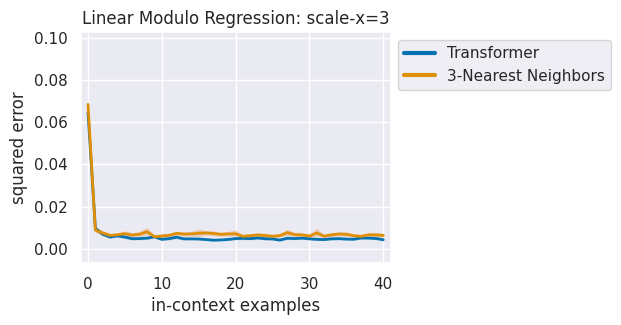

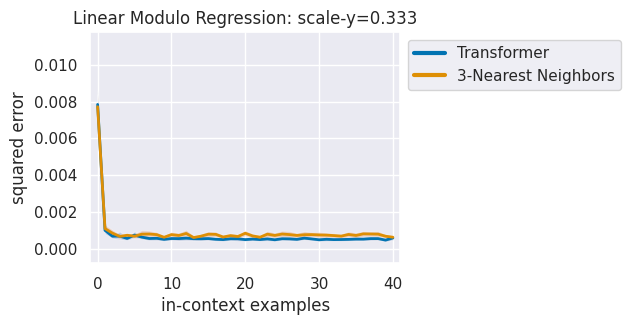

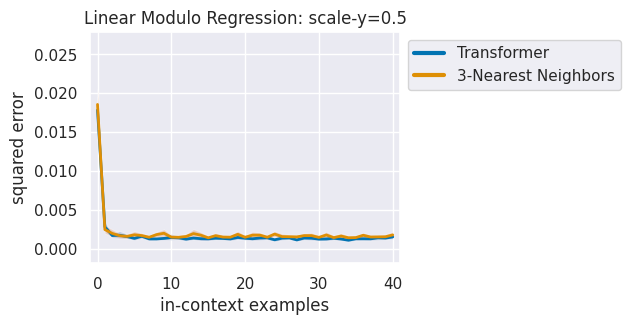

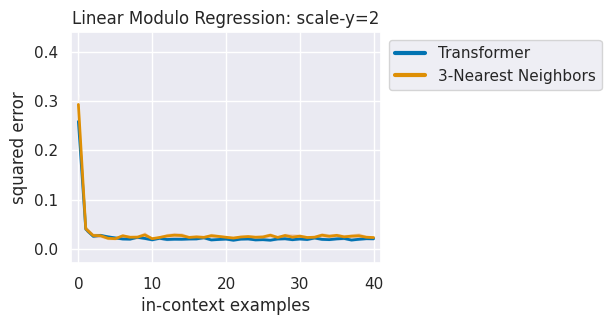

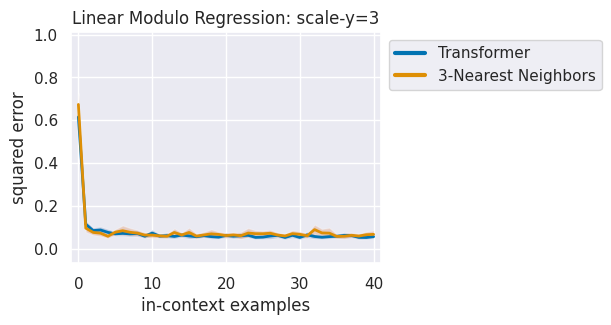

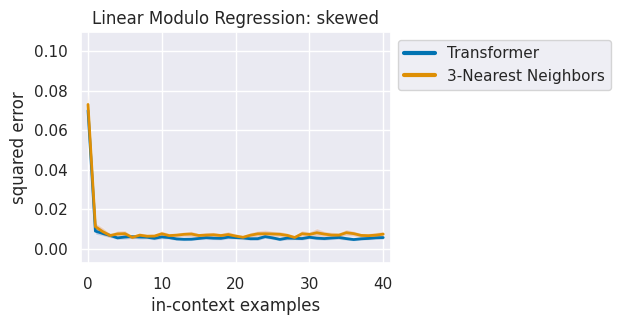

saw_regression_standard 8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e


100%|██████████| 14/14 [00:00<00:00, 124407.32it/s]


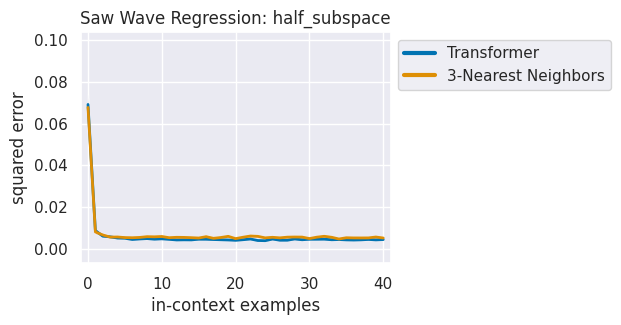

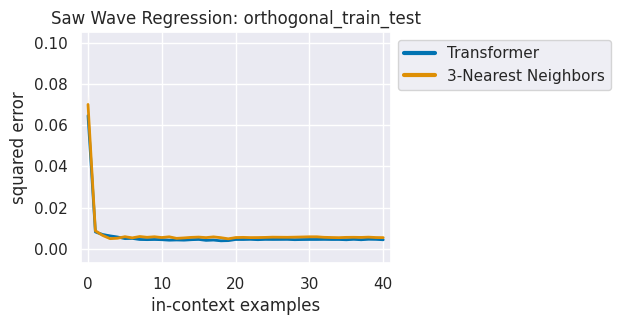

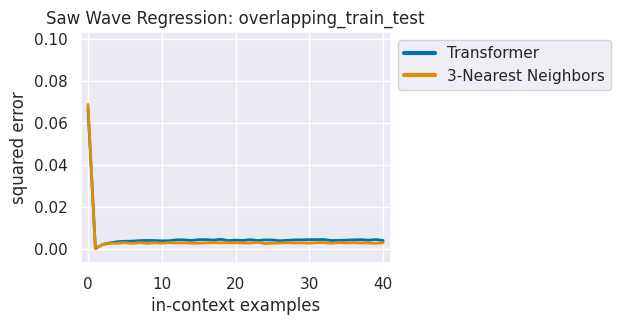

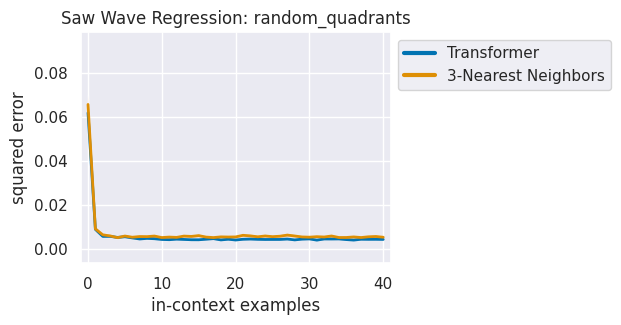

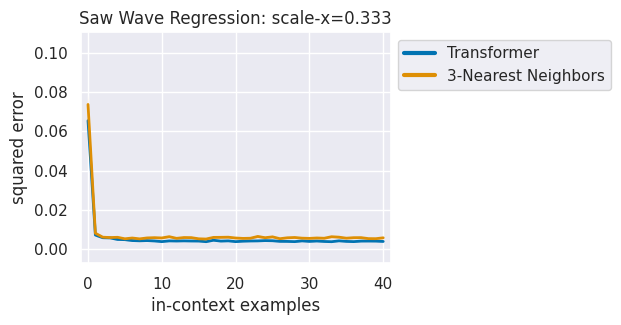

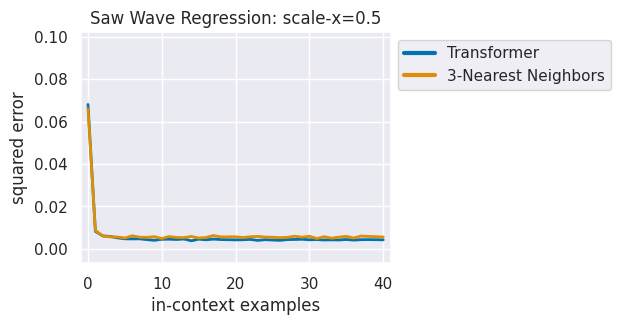

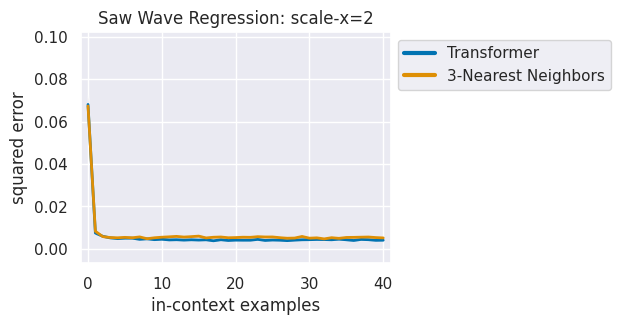

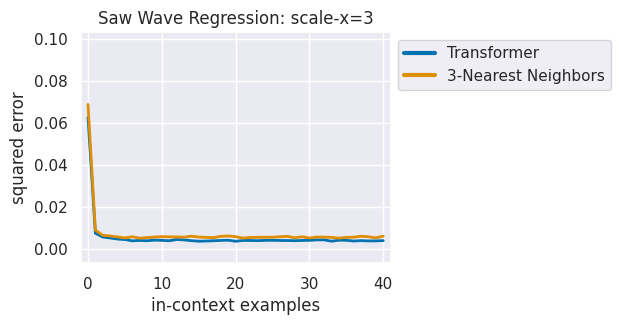

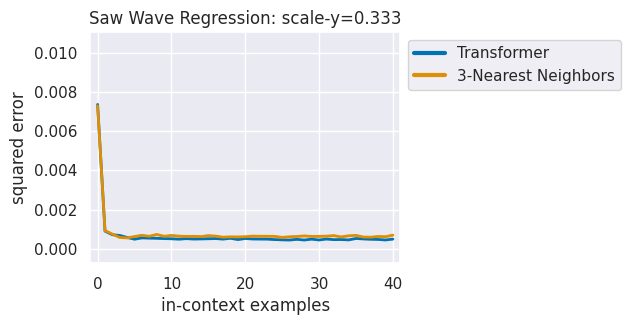

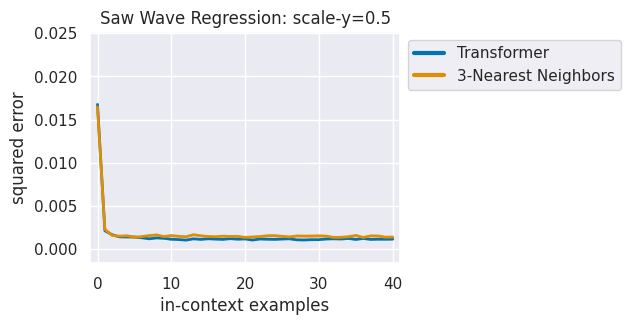

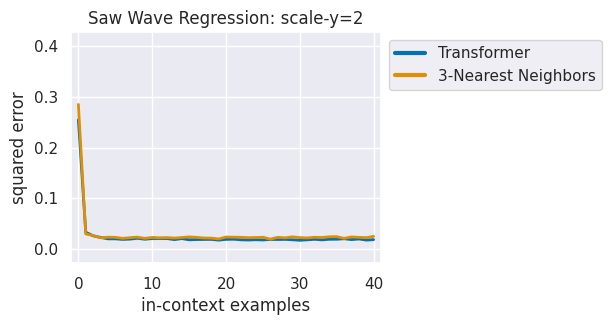

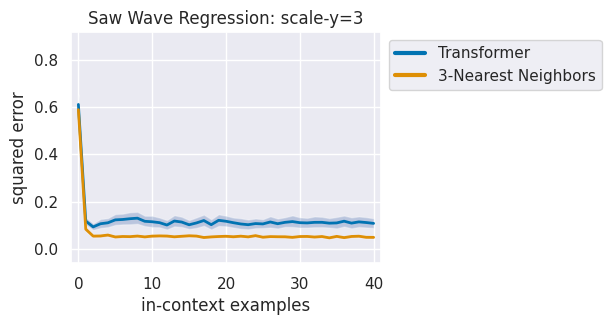

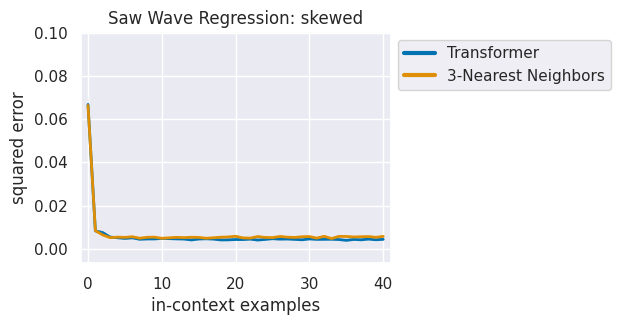

square_wave_regression_standard cb16b7e7-92c0-47fa-8a5b-40f9840f7e17


100%|██████████| 14/14 [00:00<00:00, 126825.61it/s]


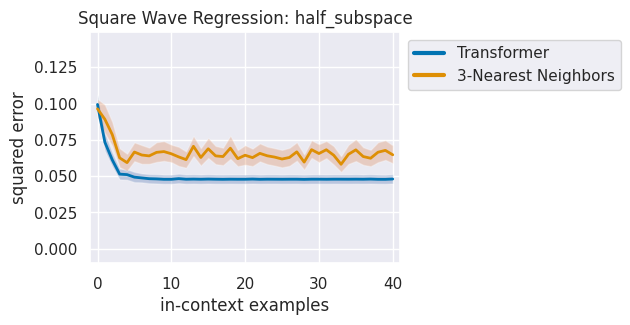

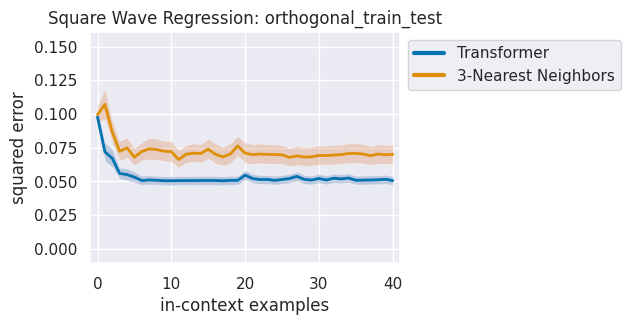

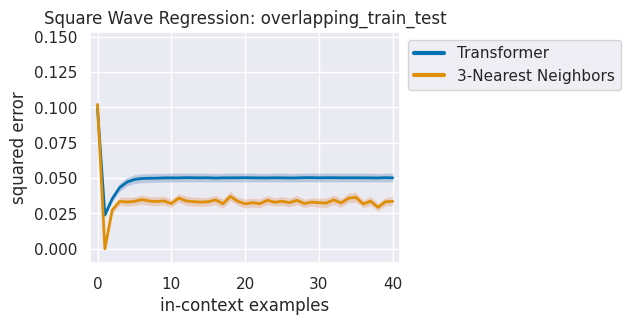

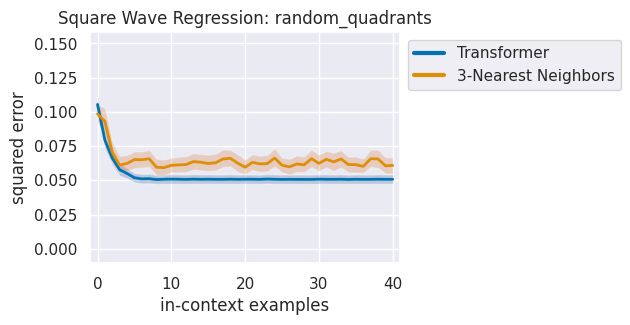

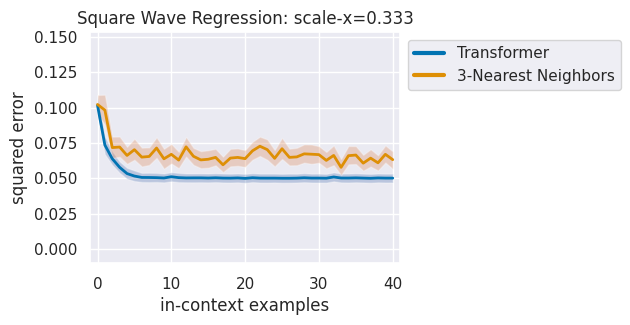

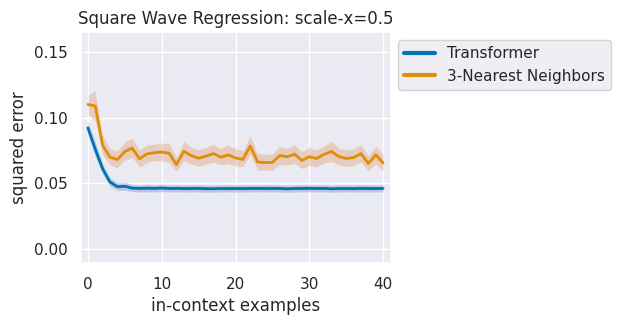

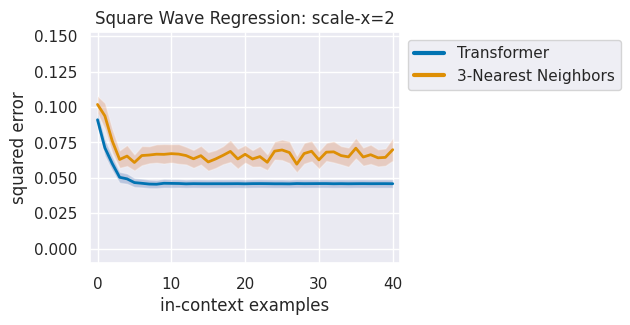

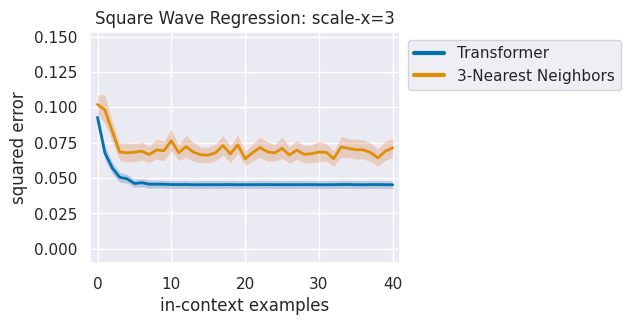

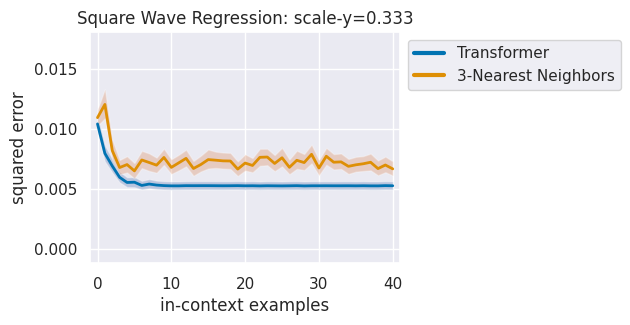

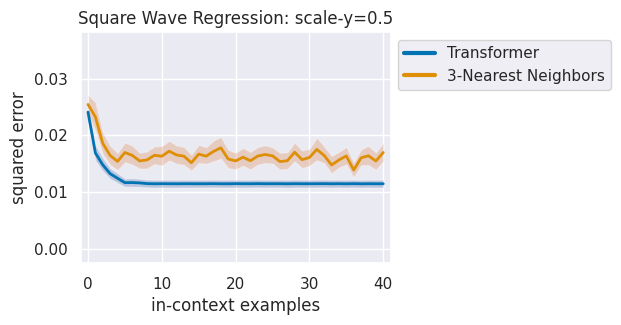

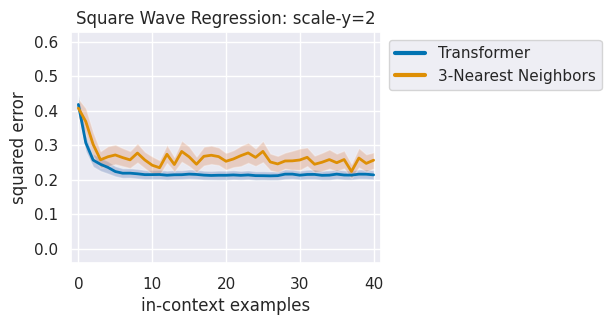

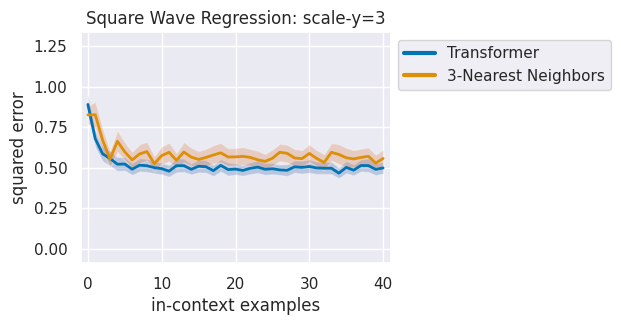

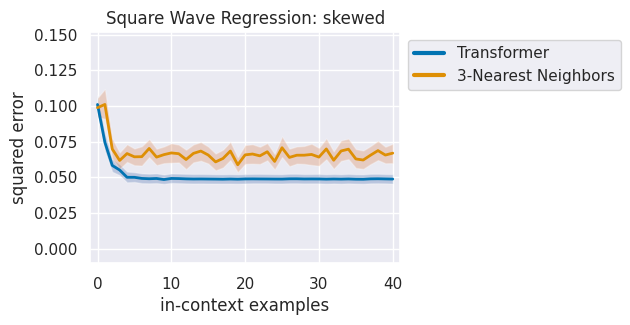

triangle_wave_regression_standard 9130cfcc-bc09-4887-ae64-2d0a869f8718


100%|██████████| 14/14 [00:00<00:00, 136877.05it/s]


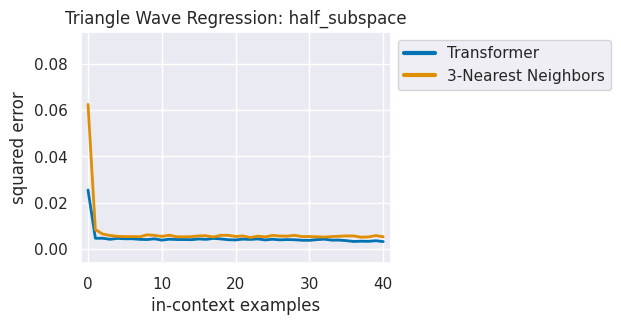

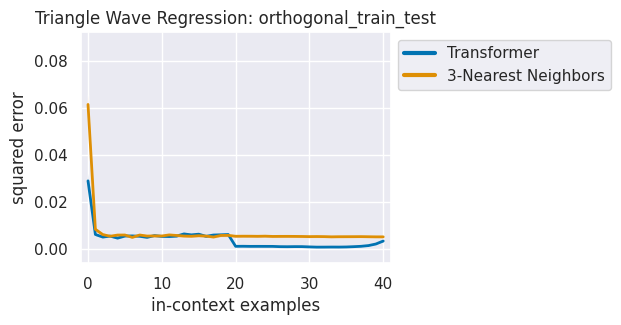

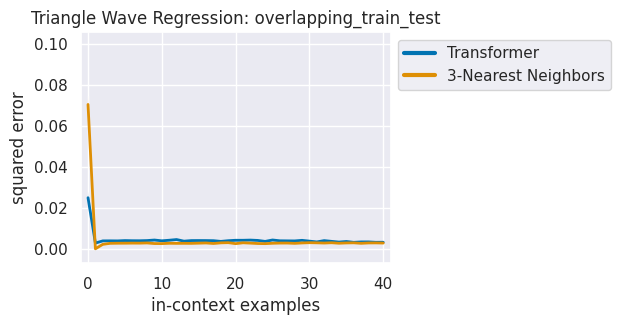

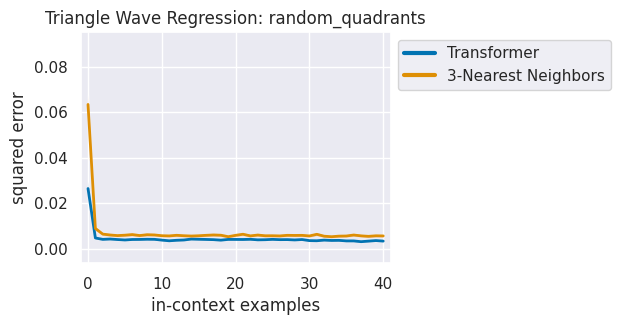

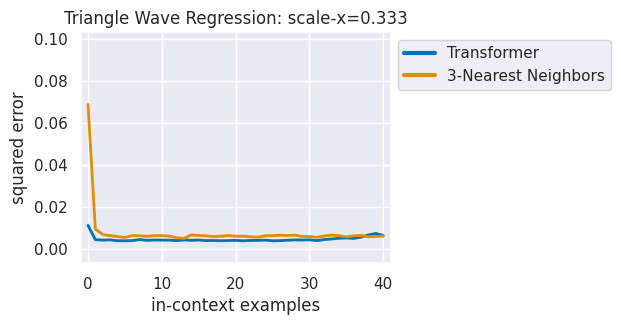

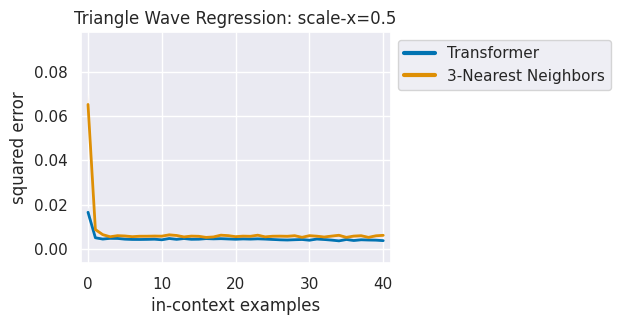

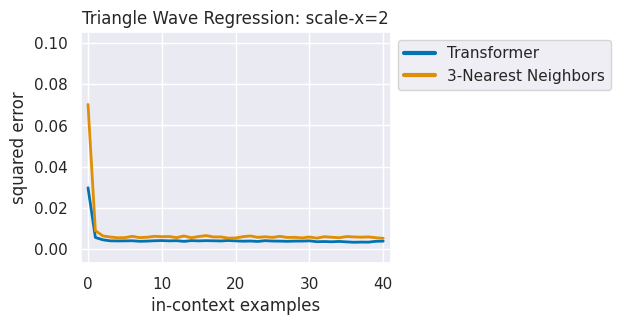

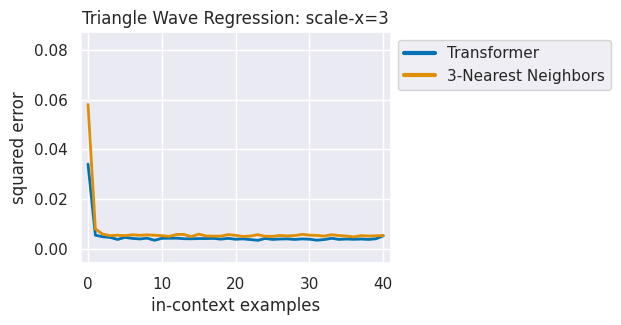

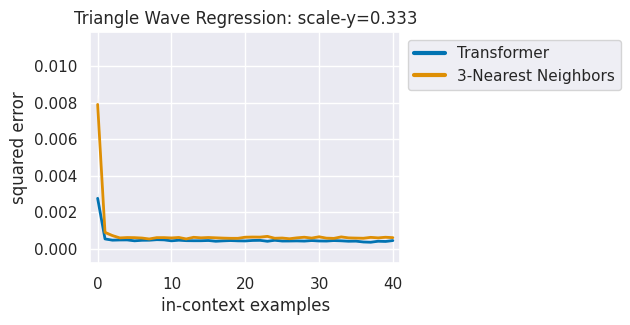

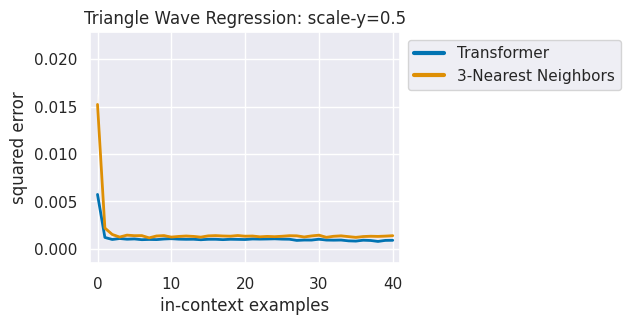

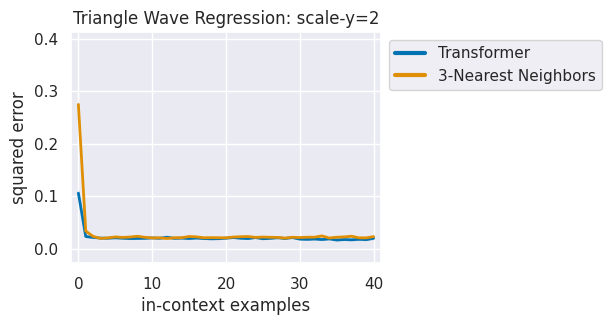

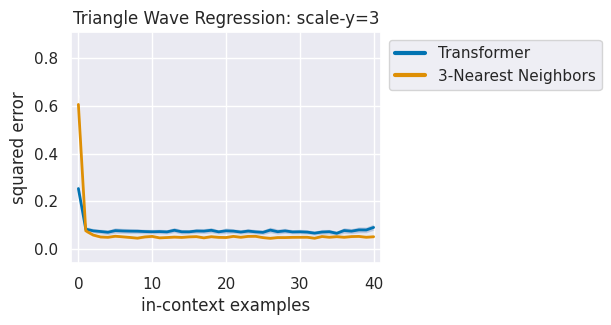

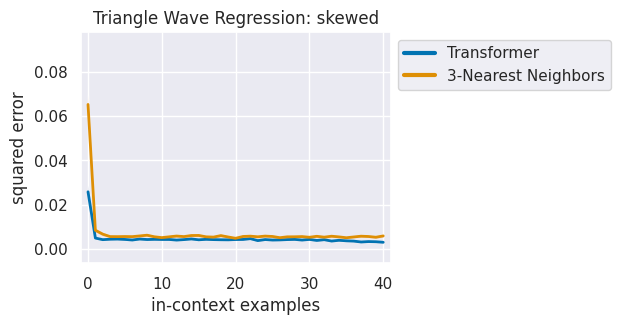

In [5]:
tasks = [
    "sum_sine_regression", 
    "radial_sine_regression", 
    "linear_sine_regression", 
    "linear_modulo_regression", 
    "saw_regression", 
    "square_wave_regression", 
    "triangle_wave_regression"
]

task_to_title = {
    "sum_sine_regression": "Sum Sine Regression", 
    "radial_sine_regression": "Radial Sine Regression",
    "linear_sine_regression": "Linear Sine Regression",
    "linear_modulo_regression": "Linear Modulo Regression",
    "saw_regression": "Saw Wave Regression",
    "square_wave_regression": "Square Wave Regression",
    "triangle_wave_regression": "Triangle Wave Regression",
}

for task in tasks:
    run_id = df[df["task"] == task]["run_id"].iat[0]

    run_path = os.path.join(run_dir, task, run_id)
    # recompute_metrics = True

    # if recompute_metrics:
    #     get_run_metrics(run_path, step=500_000)

    
    def valid_row(r):
        return r.task == task and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
    _, conf = get_model_from_run(run_path, only_conf=True)
    n_dims = conf.model.n_dims

    models = relevant_model_names[task]
    # fig, ax = basic_plot(metrics["standard"], models=models)
    # ax.set_ylim(-0.01, 0.1)
    # plt.title(task_to_title[task] + ", In Distribution")
    # plt.show()

    for name, metric in metrics.items():
        if name == "standard": continue
    
        if "scale" in name:
            scale = float(name.split("=")[-1])**2
        else:
            scale = 1.0

        trivial = 1000.0 if "noisy" not in name else (1+1/n_dims) #don't like it
        fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)

        convert_to_spaces = name.replace("-", " ").replace("_", " ")
        words = convert_to_spaces.split()
        lowered = ["x", "y"]
        capitalized = [word if word in lowered else word.capitalize() for word in words]
        title_name = " ".join(capitalized)

        ax.set_title(task_to_title[task] + ": " + title_name)
        
        # if "ortho" in name:
        #     ax.set_xlim(-1, n_dims - 1)
        # ax.set_ylim(-.1 * scale, 1.5 * scale)
        # if models is not None:
        #     metrics = {k: metrics[k] for k in models}
        
        max_err = 0
        for name, vs in metric.items():
            max_err = max(np.max(vs["mean"]), max_err)

        ax.set_ylim(-.1 * max_err, 1.5 * max_err)
        ax.set_xlim(-1, len(vs["mean"]))

        fig_dir = "/figures"
        filename = (title_name
            .lower()
            .replace(" ", "_")
            .replace("0.333", "third")
            .replace("0.5", "third")
            .replace("0.333", "third")
            .replace("0.333", "third")
        )

        plt.

        plt.show()